In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
!wget -q https://github.com/velasquezjeisson/udem/raw/refs/heads/master/Proyecto%202/MateriasPrimasConsolidado.xlsx

In [3]:
df = pd.read_excel('~/MateriasPrimasConsolidado.xlsx', sheet_name='MateriasPrimasConsolidado', header=0, index_col=0)
df = df.dropna(axis=0, how='any')
df = df.dropna(axis=1, how='any')
df = df.drop(axis=1, labels=['Local_Timestamp','TimeStampDb','Partida','Solicitud','Valor_SP_Final','SP_Activo_Final','MateriaPrima','Equipo'])
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'], dayfirst=True)
df.set_index('Time_Stamp', inplace=True)


df.head()

/tmp/ipykernel_51569/971501995.py:5: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S.%f format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'], dayfirst=True)


,PV_Final
Time_Stamp,
2024-11-28 00:33:00,1564.600590
2024-11-28 00:34:00,199.658432
2024-11-28 01:25:00,9.950685
2024-11-28 01:27:00,250.885925
2024-11-28 01:44:00,99.933740


In [4]:
df.tail()

,PV_Final
Time_Stamp,
2025-04-29 08:25:00,13.970554
2025-04-29 09:46:00,119.028374
2025-04-29 09:52:00,4780.677000
2025-04-29 10:11:00,502.702148
2025-04-29 10:30:00,270.217072


In [5]:
df_diario = df.resample('D').sum()

In [6]:
df_diario.head()

,PV_Final
Time_Stamp,
2024-11-28,45326.884966
2024-11-29,36743.113796
2024-11-30,53868.828773
2024-12-01,45649.366172
2024-12-02,48712.132305


<Axes: title={'center': 'Consumo diario de materias primas'}, xlabel='Time_Stamp'>

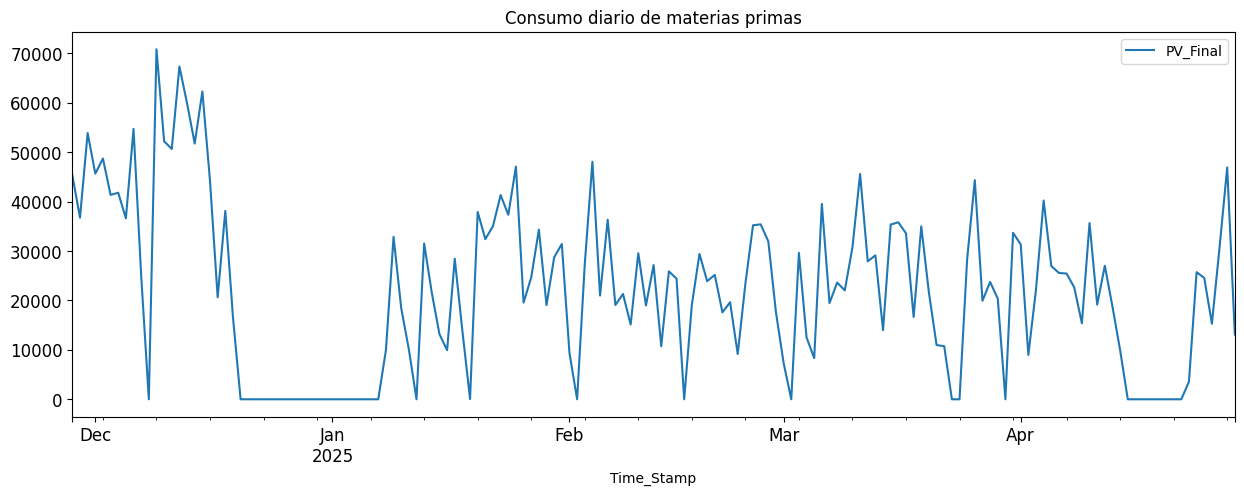

In [7]:
df_diario.plot(figsize=(15, 5), title='Consumo diario de materias primas', fontsize=12)

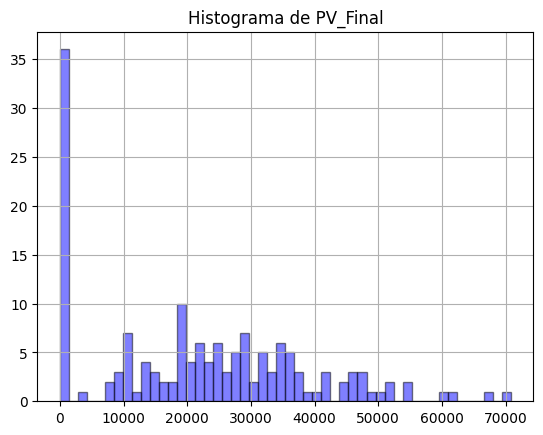

In [8]:
df_diario.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
plt.title('Histograma de PV_Final')
plt.show()


Text(0.5, 1.0, 'Histograma de PV_Final (filtrado)')

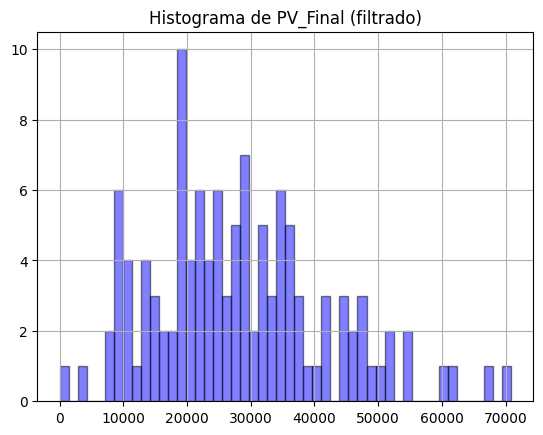

In [9]:
df_filtrado = df_diario[df_diario["PV_Final"] > 0]
df_filtrado["PV_Final"].hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
plt.title('Histograma de PV_Final (filtrado)')

In [10]:
df_filtrado.head()

,PV_Final
Time_Stamp,
2024-11-28,45326.884966
2024-11-29,36743.113796
2024-11-30,53868.828773
2024-12-01,45649.366172
2024-12-02,48712.132305


In [11]:
retardo = 10
for i in range(1, retardo+1):
    df_filtrado['PV_Final-'+str(i)] = df_filtrado['PV_Final'].shift(i)
df_filtrado.dropna(inplace=True)
df_filtrado.head()

/tmp/ipykernel_51569/347331424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['PV_Final-'+str(i)] = df_filtrado['PV_Final'].shift(i)
/tmp/ipykernel_51569/347331424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['PV_Final-'+str(i)] = df_filtrado['PV_Final'].shift(i)
/tmp/ipykernel_51569/347331424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,PV_Final,PV_Final-1,PV_Final-2,PV_Final-3,PV_Final-4,PV_Final-5,PV_Final-6,PV_Final-7,PV_Final-8,PV_Final-9,PV_Final-10
Time_Stamp,,,,,,,,,,,
2024-12-09,70812.816218,25037.904327,54701.582421,36603.260904,41793.329006,41345.731658,48712.132305,45649.366172,53868.828773,36743.113796,45326.884966
2024-12-10,52197.367577,70812.816218,25037.904327,54701.582421,36603.260904,41793.329006,41345.731658,48712.132305,45649.366172,53868.828773,36743.113796
2024-12-11,50643.087150,52197.367577,70812.816218,25037.904327,54701.582421,36603.260904,41793.329006,41345.731658,48712.132305,45649.366172,53868.828773
2024-12-12,67331.542463,50643.087150,52197.367577,70812.816218,25037.904327,54701.582421,36603.260904,41793.329006,41345.731658,48712.132305,45649.366172
2024-12-13,59858.023020,67331.542463,50643.087150,52197.367577,70812.816218,25037.904327,54701.582421,36603.260904,41793.329006,41345.731658,48712.132305


In [12]:
X = df_filtrado.drop('PV_Final', axis=1)
y = df_filtrado['PV_Final']
X_train = X.iloc[:-30]
X_test = X.iloc[-30:]
y_train = y.iloc[:-30]
y_test = y.iloc[-30:]

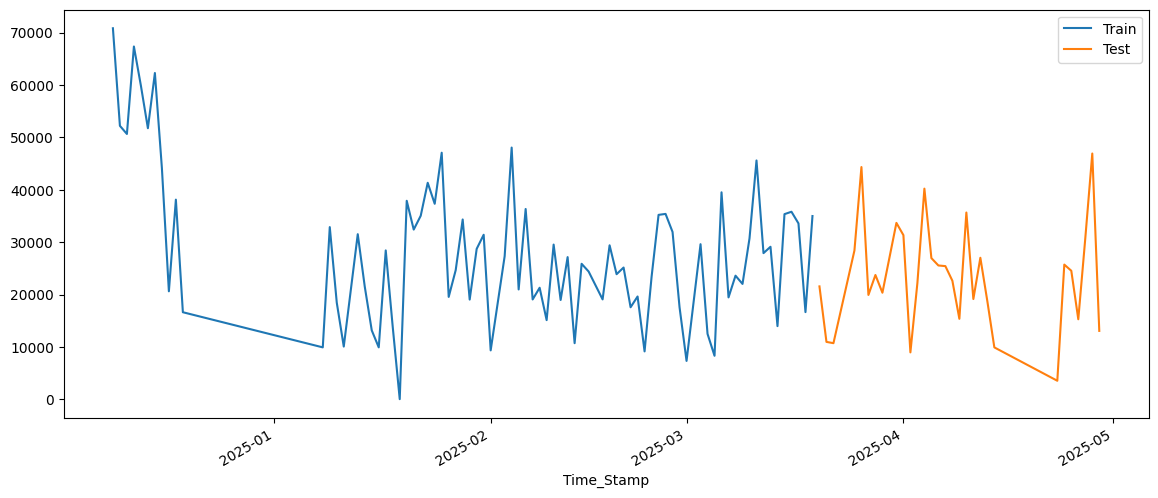

In [13]:
plt.figure(figsize=(14, 6))  # ← amplia el tamaño de la figura
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.legend()

Normalización en caso de que se requiera

In [14]:
import numpy as np

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)


Score por Smape

Score Mape

In [15]:
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.metrics import make_scorer


mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)


### Modelo por XGBoost

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy.stats import uniform, randint


# Mismo espacio de hiperparámetros (puedes dejarlo como lista o usar distribuciones estadísticas)
param_distributions = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 2]
}

model = XGBRegressor(objective='reg:squarederror', random_state=42)

model_xgb = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,  # número de combinaciones aleatorias a probar (ajústalo según el tiempo disponible)
    scoring=mape_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

model_xgb.fit(X_train_log, y_train_log)

print("Mejores parámetros:", model_xgb.best_params_)
print("Mejor score de validación:", model_xgb.best_score_)
print("Score de entrenamiento:", model_xgb.score(X_train_log, y_train_log))
print("Score de prueba:", model_xgb.score(X_test_log, y_test_log))

y_pred_xgb_log = model_xgb.predict(X_test_log)
y_pred_xgb = np.expm1(y_pred_xgb_log)


mape_test_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Mejores parámetros: {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Mejor score de validación: -0.060569170477112626
Score de entrenamiento: -0.04719767528534409
Score de prueba: -0.04330223864663891


In [17]:
mape_test_xgb

0.5947204097120741

/tmp/ipykernel_51569/4074096641.py:4: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(y_test.index, y_pred_xgb, label='Predicción', color='red')


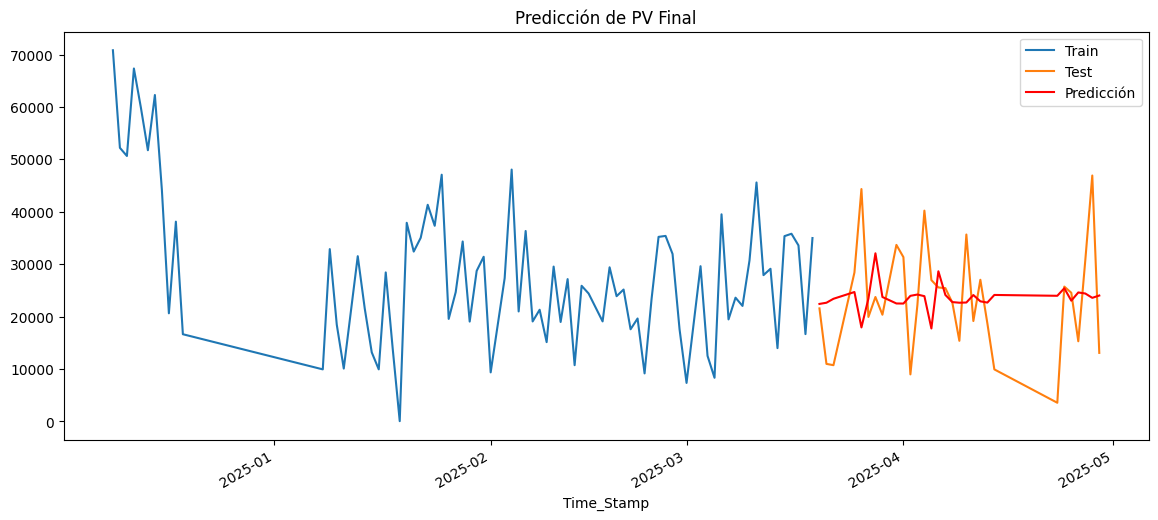

In [18]:
plt.figure(figsize=(14, 6))  # ← amplia el tamaño de la figura
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.plot(y_test.index, y_pred_xgb, label='Predicción', color='red')
plt.title('Predicción de PV Final')
plt.legend()

/tmp/ipykernel_51569/3838457710.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importance.head(20), x='Importancia', y='Variable', palette='viridis')


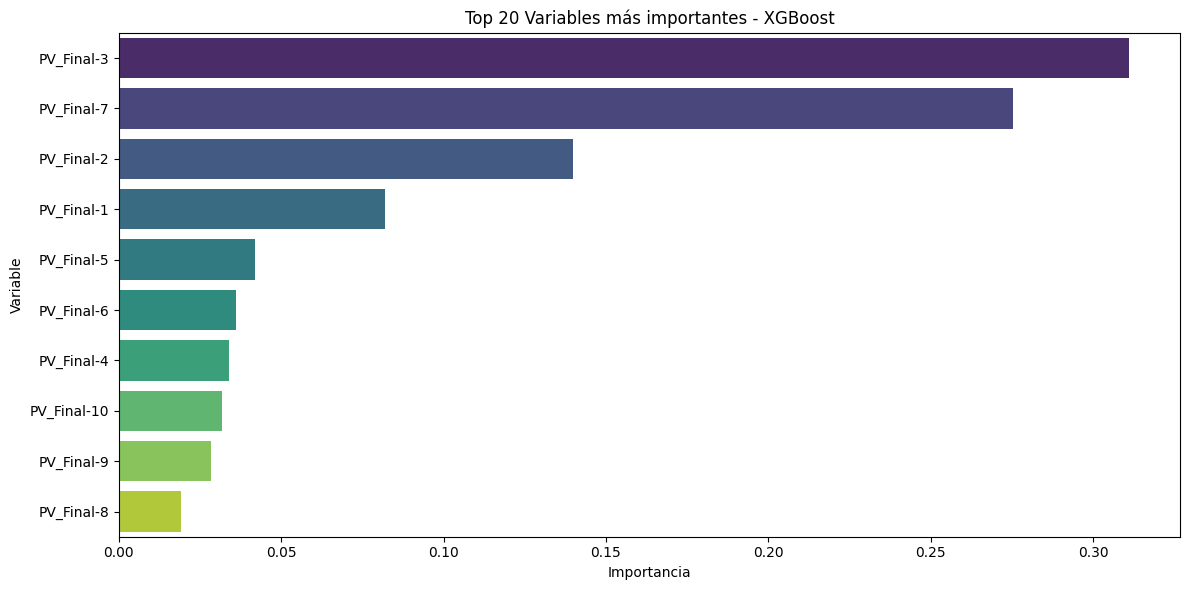

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener un modelo ya entrenado. Por ejemplo:
# model_xgb.fit(X_train, y_train)

# Crear un DataFrame con las importancias
importances = model_xgb.best_estimator_.feature_importances_
features = X_train.columns  # asegúrate que X_train sea un DataFrame

df_importance = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Visualizar
plt.figure(figsize=(12, 6))
sns.barplot(data=df_importance.head(20), x='Importancia', y='Variable', palette='viridis')
plt.title('Top 20 Variables más importantes - XGBoost')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


### Modelo por DecisionTreeRegressor

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error

# Definir espacio de hiperparámetros
param_distributions_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Modelo base
dt = DecisionTreeRegressor(random_state=42)

# Búsqueda aleatoria con validación cruzada y MAPE
model_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_distributions_dt,
    n_iter=10,  # puedes aumentar si quieres probar más combinaciones
    scoring=mape_scorer,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Entrenamiento
model_dt.fit(X_train_log, y_train_log)

# Resultados
print("Mejores parámetros:", model_dt.best_params_)
print(f"Score de validación cruzada (MAPE): {-model_dt.best_score_:.2f}%")
print(f"Score de entrenamiento (MAPE): {-model_dt.score(X_train_log, y_train_log):.2f}%")
print(f"Score de prueba (MAPE): {-model_dt.score(X_test_log, y_test_log):.2f}%")


# Calcular MAPE en test
y_pred_dt_log = model_dt.predict(X_test_log)
y_pred_dt = np.expm1(y_pred_dt_log)

mape_test_dt = mean_absolute_percentage_error(np.expm1(y_test_log), y_pred_dt)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 3}
Score de validación cruzada (MAPE): 0.07%
Score de entrenamiento (MAPE): 0.05%
Score de prueba (MAPE): 0.05%


In [21]:
mape_test_dt

0.6109976827398269

/tmp/ipykernel_51569/3134252426.py:4: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(y_test.index, y_pred_dt, label='Predicción', color='red')


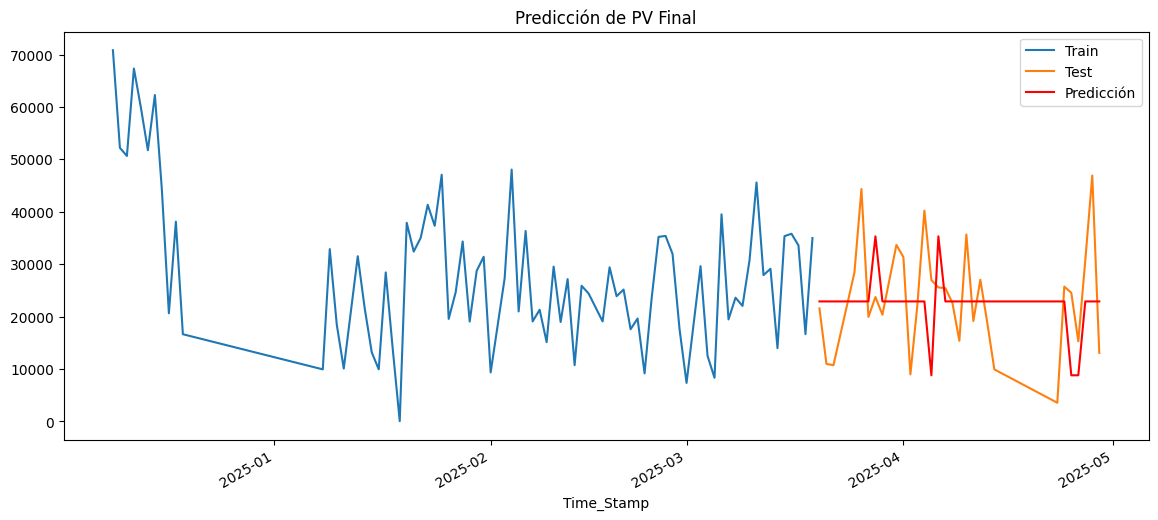

In [22]:
plt.figure(figsize=(14, 6))  # ← amplia el tamaño de la figura
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.plot(y_test.index, y_pred_dt, label='Predicción', color='red')
plt.title('Predicción de PV Final')
plt.legend()

### Modelo por GradientBoostingRegressor

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error

# Hiperparámetros para Gradient Boosting
param_distributions_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 1.0]
}

# Modelo base
gb = GradientBoostingRegressor(random_state=42)

# Búsqueda aleatoria con validación cruzada y MAPE
model_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_distributions_gb,
    n_iter=30,  # puedes ajustar según el tiempo disponible
    scoring=mape_scorer,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Entrenar con la variable logarítmica
model_gb.fit(X_train_log, y_train_log)

# Mostrar resultados
print("Mejores parámetros:", model_gb.best_params_)
print(f"Score de validación cruzada (MAPE): {-model_gb.best_score_:.2f}%")
print(f"Score de entrenamiento (MAPE): {-model_gb.score(X_train_log, y_train_log):.2f}%")
print(f"Score de prueba (MAPE): {-model_gb.score(X_test_log, y_test_log):.2f}%")

# Predicción y evaluación en escala original
y_pred_gb_log = model_gb.predict(X_test_log)
y_pred_gb = np.expm1(y_pred_gb_log)

# MAPE real en escala original
mape_test_gb = mean_absolute_percentage_error(np.expm1(y_test_log), y_pred_gb)
print(f"MAPE real en prueba (escala original): {mape_test_gb * 100:.2f}%")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores parámetros: {'subsample': 0.7, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.01}
Score de validación cruzada (MAPE): 0.06%
Score de entrenamiento (MAPE): 0.05%
Score de prueba (MAPE): 0.04%
MAPE real en prueba (escala original): 54.21%


In [24]:
mape_test_gb

0.542087688362128

In [27]:
import joblib

# Guardar el mejor modelo encontrado en el RandomizedSearchCV
joblib.dump(model_gb.best_estimator_, "modelo_gb.pkl")
# Cargar el modelo guardado

['modelo_gb.pkl']

In [27]:
model_gb.predict(X_test_log)

array([10.10487902, 10.01521406, 10.04211521, 10.08758958,  9.91569379,
        9.99477307, 10.24463766, 10.05358224,  9.93089032, 10.03981323,
       10.09623299,  9.93016638, 10.06976348,  9.6308564 , 10.17859216,
       10.10837076, 10.00004001,  9.82268799, 10.05615611, 10.07132312,
        9.97802899, 10.0409999 , 10.09220718, 10.00962099, 10.07253037,
        9.5809842 ,  9.6609183 , 10.14690175, 10.08386797,  9.81022244])

In [33]:
import boto3
from dotenv import load_dotenv


load_dotenv(dotenv_path='conf.env')

# Obtener las credenciales de las variables de entorno
aws_access_key_id = os.getenv('AWS_ACCESS_KEY_ID')
aws_secret_access_key = os.getenv('AWS_SECRET_ACCESS_KEY')

# Inicializar cliente de S3
s3 = boto3.client('s3')

# Datos de tu bucket y nombre del archivo
bucket_name = 'udem-proyecto2'
s3_path = 'modelos/modelo_gb.pkl'

# Subida a S3
s3.upload_file('modelo_gb.pkl', bucket_name, s3_path)

print(f"Modelo subido a s3://{bucket_name}/{s3_path}")


Modelo subido a s3://udem-proyecto2/modelos/modelo_gb.pkl


/tmp/ipykernel_51569/523898098.py:4: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(y_test.index, y_pred_gb, label='Predicción', color='red')


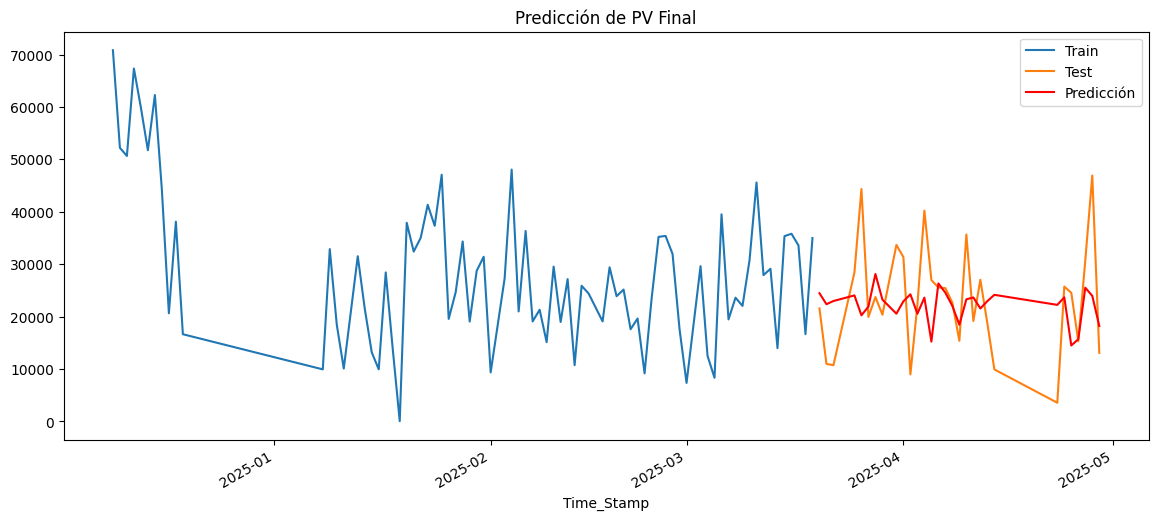

In [26]:
plt.figure(figsize=(14, 6))  # ← amplia el tamaño de la figura
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.plot(y_test.index, y_pred_gb, label='Predicción', color='red')
plt.title('Predicción de PV Final')
plt.legend()

### Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error

# Espacio de hiperparámetros para Random Forest
param_distributions_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Modelo base
rf = RandomForestRegressor(random_state=42)

# Randomized Search con validación cruzada y MAPE
model_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions_rf,
    n_iter=30,  # puedes aumentar si tienes tiempo
    scoring=mape_scorer,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Entrenamiento con la variable objetivo transformada
model_rf.fit(X_train_log, y_train_log)

# Reporte de resultados
print("Mejores parámetros:", model_rf.best_params_)
print(f"Score de validación cruzada (MAPE): {-model_rf.best_score_:.2f}%")
print(f"Score de entrenamiento (MAPE): {-model_rf.score(X_train_log, y_train_log):.2f}%")
print(f"Score de prueba (MAPE): {-model_rf.score(X_test_log, y_test_log):.2f}%")

# Predicción y evaluación en escala original
y_pred_rf_log = model_rf.predict(X_test_log)
y_pred_rf = np.expm1(y_pred_rf_log)
mape_test_rf = mean_absolute_percentage_error(np.expm1(y_test_log), y_pred_rf)
print(f"MAPE real en prueba (escala original): {mape_test_rf * 100:.2f}%")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores parámetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 3}
Score de validación cruzada (MAPE): 0.06%
Score de entrenamiento (MAPE): 0.05%
Score de prueba (MAPE): 0.04%
MAPE real en prueba (escala original): 55.08%


In [63]:
mape_test_rf

0.5508447751620772

/tmp/ipykernel_68932/4283252758.py:4: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(y_test.index, y_pred_rf, label='Predicción', color='red')


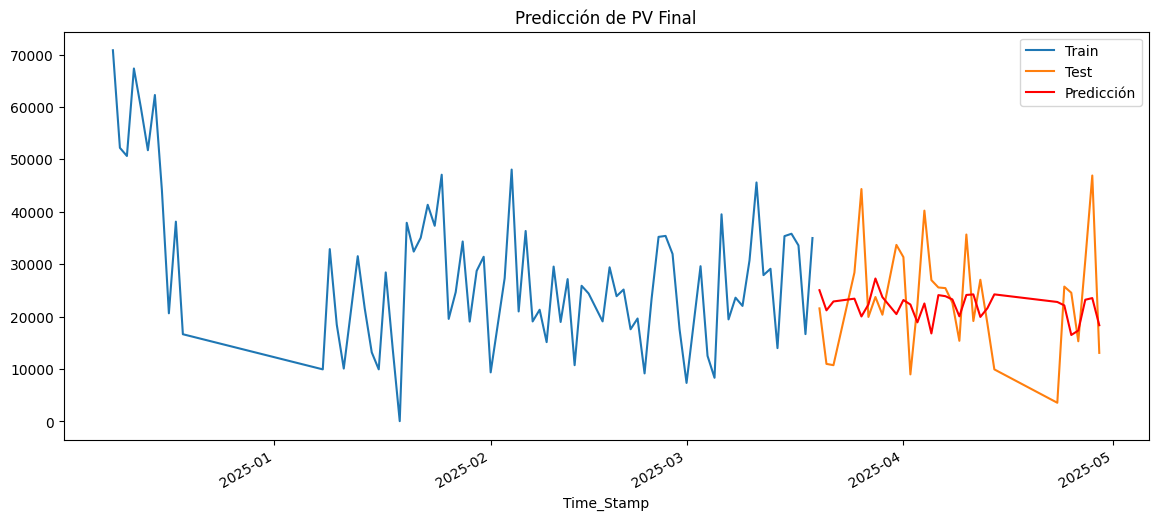

In [64]:
plt.figure(figsize=(14, 6))  # ← amplia el tamaño de la figura
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.plot(y_test.index, y_pred_rf, label='Predicción', color='red')
plt.title('Predicción de PV Final')
plt.legend()

### Comparacion modelos por MAPE

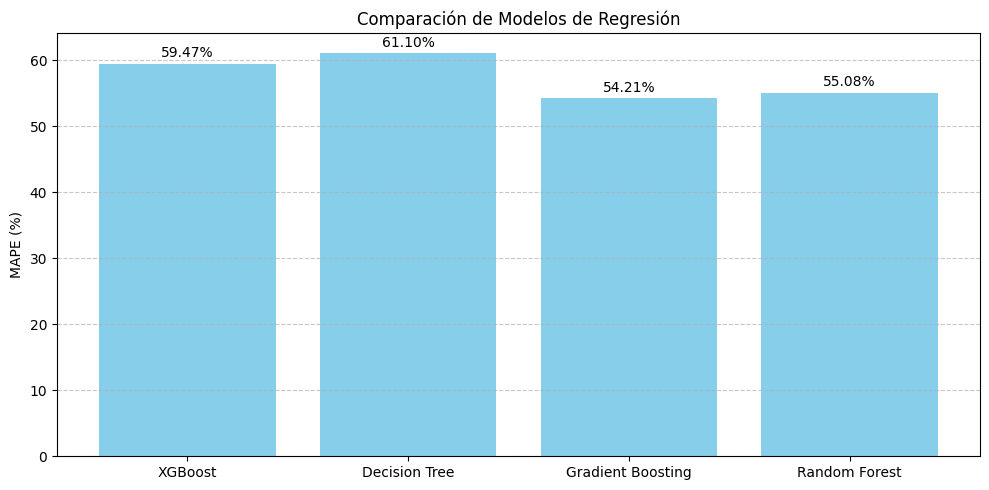

In [65]:
x = ['XGBoost', 'Decision Tree', 'Gradient Boosting', 'Random Forest']
y = [mape_test_xgb*100, mape_test_dt*100, mape_test_gb*100, mape_test_rf*100]

plt.figure(figsize=(10, 5))
bars = plt.bar(x, y, color='skyblue')
plt.ylabel('MAPE (%)')
plt.title('Comparación de Modelos de Regresión')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


/tmp/ipykernel_68932/2818503205.py:4: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(y_test.index, y_pred_rf, label='random forest', color='red')


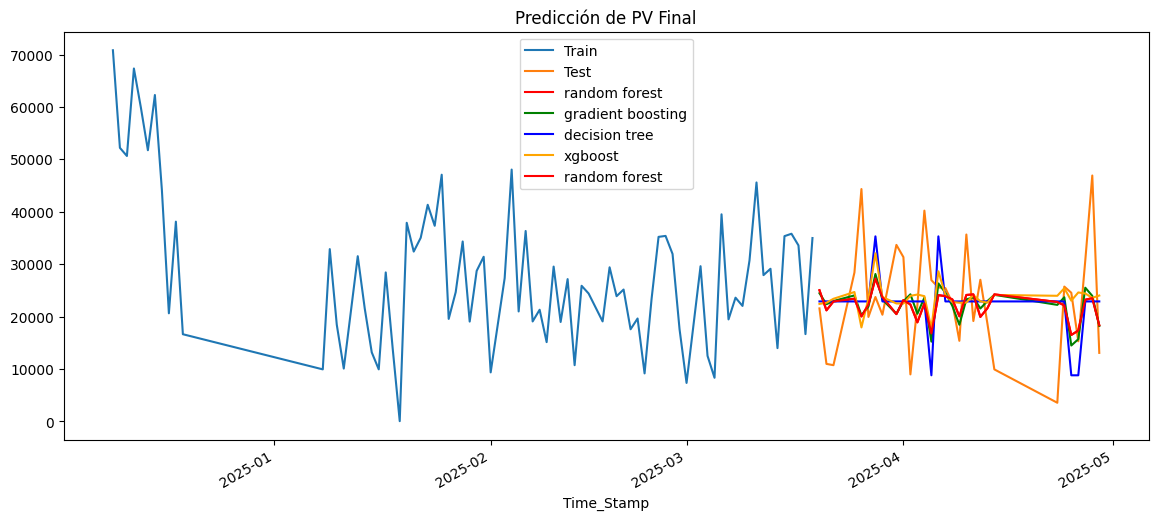

In [66]:
plt.figure(figsize=(14, 6))  # ← amplia el tamaño de la figura
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.plot(y_test.index, y_pred_rf, label='random forest', color='red')
plt.plot(y_test.index, y_pred_gb, label='gradient boosting', color='green')
plt.plot(y_test.index, y_pred_dt, label='decision tree', color='blue')
plt.plot(y_test.index, y_pred_xgb, label='xgboost', color='orange')
plt.plot(y_test.index, y_pred_rf, label='random forest', color='red')
plt.title('Predicción de PV Final')
plt.legend()

### Implementación con DL

In [67]:
def crear_secuencias(data, ventana=10, horizonte=1):
    X, y = [], []
    for i in range(len(data) - ventana - horizonte):
        X.append(data[i:i+ventana])   # 30 días de entrada
        y.append(data[i+ventana:i+ventana+horizonte])  # 5 días de salida
    return np.array(X), np.array(y)


serie = df_filtrado["PV_Final"].values

horizonte = 30
ventana = 10
X, y = crear_secuencias(serie, ventana, horizonte)

In [68]:
# Dividir en datos de entrenamiento (80%) y prueba (20%)
train_size = int(len(X) * 0.8)
X_train_lstm, X_test_lstm = X[:train_size], X[train_size:]
y_train_lstm, y_test_lstm = y[:train_size], y[train_size:]

In [69]:
# Ajustamos la forma para LSTM (samples, time steps, features)
X_train_k = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_k = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

print(f"Forma de X_train: {X_train_k.shape}, y_train: {y_train_lstm.shape}")
print(f"Forma de X_test: {X_test_k.shape}, y_test: {y_test_lstm.shape}")


Forma de X_train: (54, 10, 1), y_train: (54, 30)
Forma de X_test: (14, 10, 1), y_test: (14, 30)


In [70]:
from keras import layers, models, Input, Sequential, Model, optimizers
from keras.utils import to_categorical, plot_model

# Definir la arquitectura del modelo LSTM
model = Sequential([
    layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(ventana,1)),  # Capa LSTM con 64 neuronas
    layers.LSTM(64, activation='relu'),  # Segunda capa LSTM sin return_sequences
    layers.Dense(32, activation='relu'),  # Capa densa intermedia
    layers.Dense(32, activation='relu'),  # Capa densa intermedia
    layers.Dense(horizonte)  # Capa de salida con 30 neuronas (30 días de predicción)
])

# Compilar el modelo
optimizador = optimizers.Adam(learning_rate=0.0001)


model.compile(optimizer=optimizador, loss='mse')

# Resumen del modelo
model.summary()

2025-05-06 20:05:57.793321: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-06 20:05:58.279314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746579958.405832   68932 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746579958.458063   68932 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746579958.870810   68932 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,046 (211.12 KB)

 Trainable params: 54,046 (211.12 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
history = model.fit(X_train_k, y_train_lstm, epochs=200, batch_size=32, verbose=1)


Epoch 1/200


I0000 00:00:1746579989.169054   69480 service.cc:152] XLA service 0x384e7460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746579989.173155   69480 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-05-06 20:06:29.404896: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746579992.727967   69480 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1746580012.152638   69480 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 ━━━━━━━━━━━━━━━━━━━━ 48s 14s/step - loss: 708972800.0000
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 713714112.0000
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 711737280.0000
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 710494144.0000
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 710513344.0000
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 710817152.0000
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 708342976.0000
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 708288448.0000
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 707545152.0000
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 710464128.0000
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 707915584.0000
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 704430080.0000
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 705862528.0000 
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss

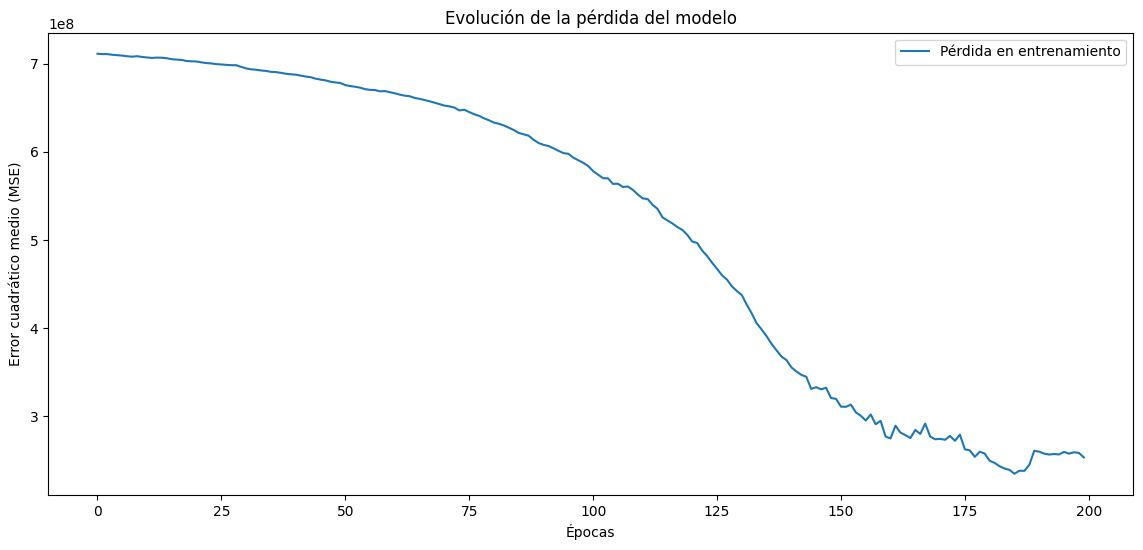

In [72]:
plt.figure(figsize=(14, 6))  # ← amplia el tamaño de la figura
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Evolución de la pérdida del modelo')
plt.legend()
plt.show()


In [73]:
predicciones = model.predict(X_test_lstm)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [74]:
mape_test_lstm = mean_absolute_percentage_error(y_test_lstm, predicciones)
print(f"MAPE real en prueba (escala original): {mape_test_lstm * 100:.2f}%")

MAPE real en prueba (escala original): 52.80%


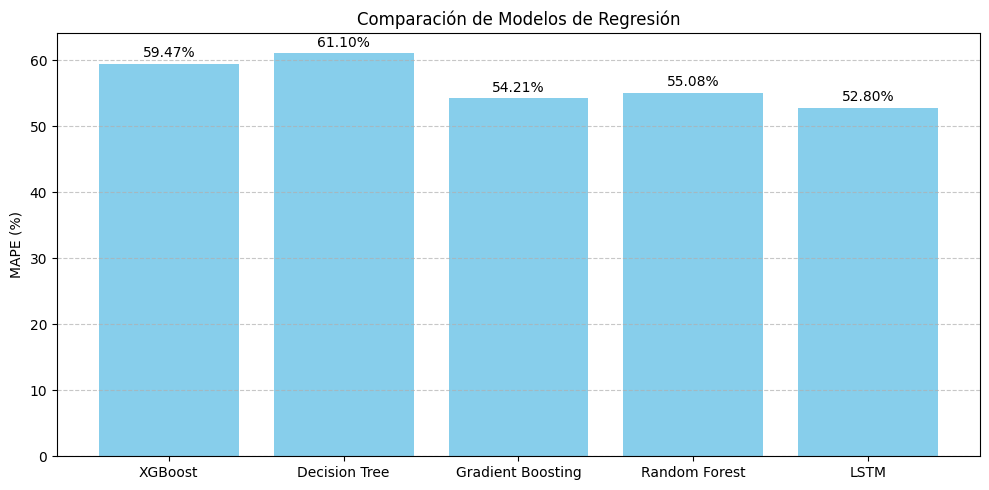

In [75]:
x = ['XGBoost', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'LSTM']
y = [mape_test_xgb*100, mape_test_dt*100, mape_test_gb*100, mape_test_rf*100, mape_test_lstm*100]

plt.figure(figsize=(10, 5))
bars = plt.bar(x, y, color='skyblue')
plt.ylabel('MAPE (%)')
plt.title('Comparación de Modelos de Regresión')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
y_pred_xgb.shape

In [ ]:
# lstm_mean_pred = predicciones.mean(axis=1)  # (14,)
lstm_mean_pred = predicciones[0]  # (14,)

plt.figure(figsize=(14, 6))  # ← amplia el tamaño de la figura
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.plot(y_test.index, y_pred_rf, label='random forest', color='red')
plt.plot(y_test.index, y_pred_gb, label='gradient boosting', color='green')
plt.plot(y_test.index, y_pred_dt, label='decision tree', color='blue')
plt.plot(y_test.index, y_pred_xgb, label='xgboost', color='orange')
plt.plot(y_test.index, y_pred_rf, label='random forest', color='red')
plt.plot(y_test.index[:len(lstm_mean_pred)], lstm_mean_pred, label='LSTM (prom)', color='purple')
plt.title('Predicción de PV Final')
plt.legend()